In [163]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import os

In [164]:
# 0) Prepare data
red_wine_path = "winequality-red.csv" 
data = pd.read_csv(red_wine_path, sep=';')

In [165]:
data.head(20)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [166]:

X_numpy = data.drop(columns=["quality"]).values
y_numpy = data["quality"].values.reshape(-1, 1)

In [167]:
# Standardize features
scaler = StandardScaler()
X_numpy = scaler.fit_transform(X_numpy)

In [168]:
# Cast to float Tensor
X = torch.tensor(X_numpy.astype(np.float32))
y = torch.tensor(y_numpy.astype(np.float32))

n_samples, n_features = X.shape

In [169]:
# 1) Model
# Linear model f = wx + b
input_size = n_features
output_size = 1
model = nn.Linear(input_size, output_size)

In [170]:
# 2) Loss and optimizer
learning_rate = 0.001

criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  

In [ ]:
# 3) Training loop
num_epochs = 1000 
loss_history = []
for epoch in range(num_epochs):
    # Forward pass and loss
    y_predicted = model(X)
    loss = criterion(y_predicted, y)
    
    # Backward pass and update
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()  # Zero grad before new step
    
    loss_history.append(loss.item())
    if (epoch+1) % 10 == 0:
        print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')

epoch: 10, loss = 30.5776
epoch: 20, loss = 29.3926
epoch: 30, loss = 28.2544
epoch: 40, loss = 27.1611
epoch: 50, loss = 26.1109
epoch: 60, loss = 25.1021
epoch: 70, loss = 24.1331
epoch: 80, loss = 23.2023
epoch: 90, loss = 22.3082
epoch: 100, loss = 21.4493
epoch: 110, loss = 20.6241
epoch: 120, loss = 19.8315
epoch: 130, loss = 19.0701
epoch: 140, loss = 18.3386
epoch: 150, loss = 17.6359
epoch: 160, loss = 16.9608
epoch: 170, loss = 16.3123
epoch: 180, loss = 15.6892
epoch: 190, loss = 15.0907
epoch: 200, loss = 14.5156
epoch: 210, loss = 13.9632
epoch: 220, loss = 13.4325
epoch: 230, loss = 12.9226
epoch: 240, loss = 12.4327
epoch: 250, loss = 11.9621
epoch: 260, loss = 11.5100
epoch: 270, loss = 11.0756
epoch: 280, loss = 10.6583
epoch: 290, loss = 10.2574
epoch: 300, loss = 9.8722
epoch: 310, loss = 9.5021
epoch: 320, loss = 9.1465
epoch: 330, loss = 8.8049
epoch: 340, loss = 8.4767
epoch: 350, loss = 8.1614
epoch: 360, loss = 7.8584
epoch: 370, loss = 7.5674
epoch: 380, loss =

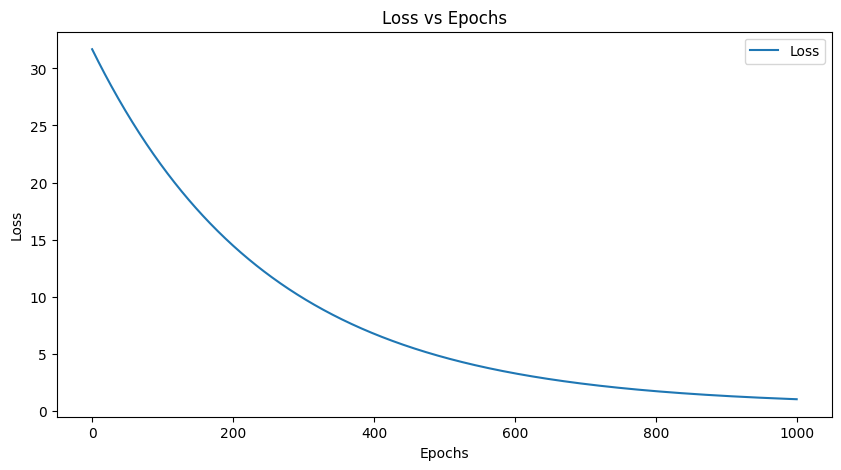

In [172]:
# Plot loss vs epochs
plt.figure(figsize=(10, 5))
plt.plot(range(num_epochs), loss_history, label='Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss vs Epochs")
plt.legend()
plt.show()

In [173]:
# Predict values
with torch.no_grad():
    predicted = model(X).numpy()

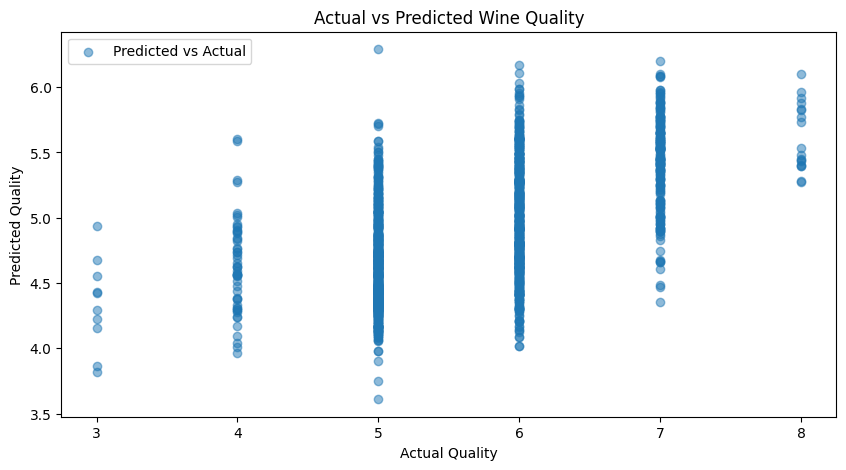

In [174]:
# Plot actual vs predicted values
plt.figure(figsize=(10, 5))
plt.scatter(y_numpy, predicted, alpha=0.5, label="Predicted vs Actual")
plt.xlabel("Actual Quality")
plt.ylabel("Predicted Quality")
plt.title("Actual vs Predicted Wine Quality")
plt.legend()
plt.show()